In [143]:
import numpy as np
from collections import defaultdict
import pandas as pd
import os
import glob
import re
import matplotlib.pyplot as plt
import seaborn as sns
import re

from experiment_code.visualization.visualize import CoRTLanguageExp
from experiment_code.visualization.visualize import EnglishVerif

import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [144]:
cort = CoRTLanguageExp()

In [145]:
df = cort.load_dataframe()

In [146]:
eng = EnglishVerif()

In [147]:
df_eng = eng.load_dataframe()

In [148]:
#df_eng = relabel_part_id(df_eng)

In [149]:
#df_eng = df_eng[df_eng.participant_id != 8]

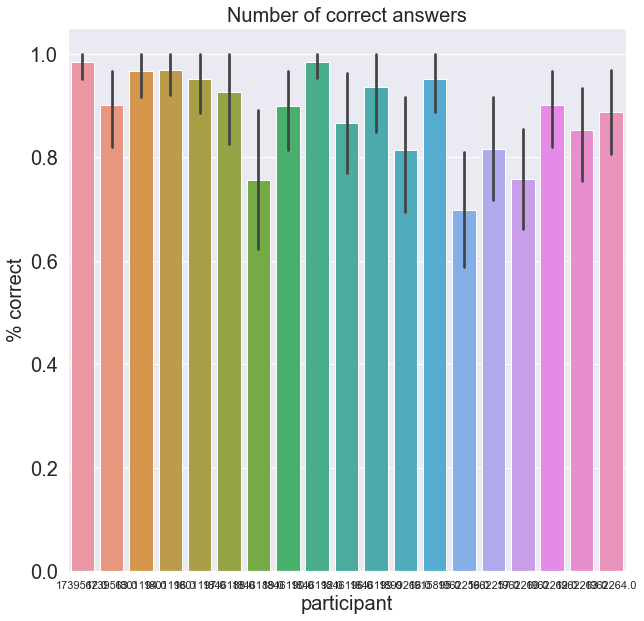

In [150]:
eng.participant_accuracy(df_eng)

In [151]:
def relabel_part_id(dataframe):
    # get all values of participant id
    old_id = dataframe['participant_id'].values

    # get new values of participant id
    temp = defaultdict(lambda: len(temp))
    res = [temp[ele] for ele in old_id]

    # assign new participant id to dataframe
    dataframe['participant_id'] = np.array(res) + 1
    
    return dataframe

In [152]:
df = relabel_part_id(df)

In [153]:
def remove_bad_subjs(dataframe, bad_subjs):
    return dataframe[~dataframe['participant_id'].isin(bad_subjs)]

In [154]:
df = remove_bad_subjs(df, bad_subjs = [8])
df['participant_id'].unique

<bound method Series.unique of 345       1
358       1
368       1
380       1
393       1
         ..
79926    18
79938    18
79948    18
79959    18
79972    18
Name: participant_id, Length: 5020, dtype: int64>

In [155]:
#df = df[df.participant_id != [8, 15]]

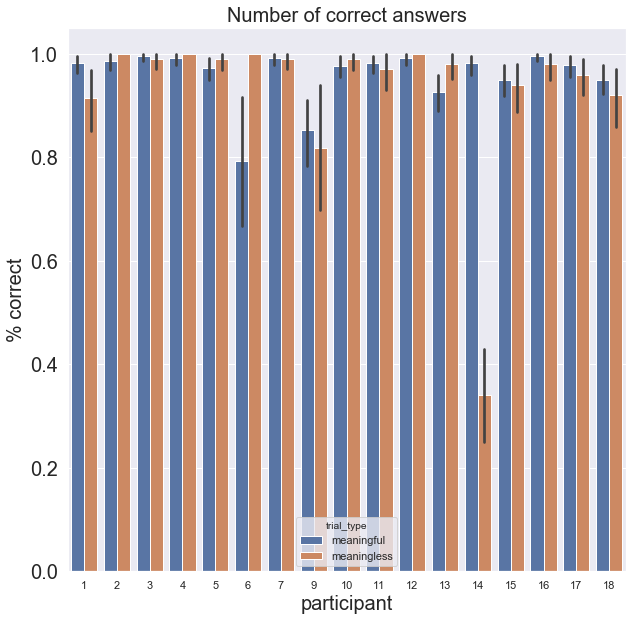

Answers mean: 0.9579681274900398


In [156]:
cort.participant_accuracy(df, hue = "trial_type")

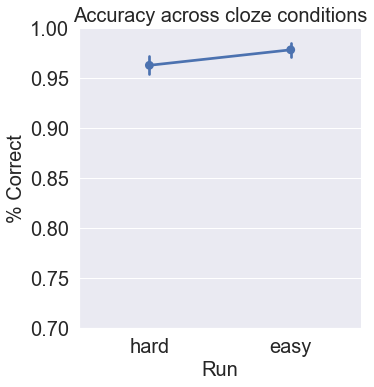

In [157]:
cort.accuracy_by_condition(df)

In [162]:
#sns.set(rc={'figure.figsize':(20,10)})

grouped_df = df.groupby(['participant_id', 'block_num']).mean()
grouped_df

# sns.catplot(x="condition_name", y="rt", hue='group', kind = 'box', data=df.query('correct==1 and trial_type=="meaningful"'))
# plt.xlabel('Cloze Condition', fontsize=20),
# plt.ylabel('Reaction Time', fontsize=20)
# plt.title('Average reaction time between cloze conditions', fontsize=20)
# plt.tick_params(axis = 'both', which = 'major', labelsize = 15);

# plt.show()

#df

#plotting every dataframe - first group by subjects

experiment_id  experiment_version  task_version  \
participant_id block_num                                                    
1              1.0              21978.0                 5.0          34.0   
               2.0              21978.0                 5.0          34.0   
               3.0              21978.0                 5.0          34.0   
               4.0              21978.0                 5.0          34.0   
               5.0              21978.0                 5.0          34.0   
...                                 ...                 ...           ...   
18             1.0              23648.0                 3.0          39.0   
               2.0              23648.0                 3.0          39.0   
               3.0              23648.0                 3.0          39.0   
               4.0              23648.0                 3.0          39.0   
               5.0              23648.0                 3.0          39.0   

                          spreadsheet_row          rt  attempt   correct  \
participant_id block_num                                                   
1              1.0             130.937500  922.098672      1.0  0.937500   
               2.0             260.312500  882.794922      1.0  0.984375   
               3.0             304.281250  845.126328      1.0  0.953125   
               4.0             172.250000  864.945391      1.0  0.953125   
               5.0              62.290909  839.138727      1.0  0.981818   
...                                   ...         ...      ...       ...   
18             1.0             318.500000  850.116484      1.0  0.921875   
               2.0              59.093750  803.343984      1.0  0.968750   
               3.0             124.000000  776.296587      1.0  0.920635   
               4.0             253.000000  790.016905      1.0  0.920635   
               5.0             188.500000  776.195000      1.0  0.968750   

                          incorrect  randomise_blocks  CoRT_mean  CoRT_std  \
participant_id block_num                                                     
1              1.0         0.062500          2.125000   2.964025  0.866439   
               2.0         0.015625          4.109375   2.950260  0.862601   
               3.0         0.046875          4.781250   2.898140  0.836361   
               4.0         0.046875          2.750000   2.961086  0.890207   
               5.0         0.018182          1.000000   3.068918  0.833685   
...                             ...               ...        ...       ...   
18             1.0         0.078125          5.000000   2.896243  0.840926   
               2.0         0.031250          1.015625   2.939583  0.864773   
               3.0         0.079365          2.000000   2.968481  0.881236   
               4.0         0.079365          4.000000   3.034392  0.843879   
               5.0         0.031250          3.000000   2.957626  0.882357   

                          cloze_probability  word_count  version  
participant_id block_num                                          
1              1.0                 0.643594    8.109375       12  
               2.0                 0.648594    8.265625       12  
               3.0                 0.628437    8.000000       12  
               4.0                 0.651250    8.421875       12  
               5.0                 0.664000    8.236364       12  
...                                     ...         ...      ...  
18             1.0                 0.626094    8.093750       12  
               2.0                 0.656406    8.218750       12  
               3.0                 0.634444    8.063492       12  
               4.0                 0.638889    8.285714       12  
               5.0                 0.651719    8.375000       12  

[80 rows x 14 columns]

In [178]:
#rate of change across blocks (1-5)


df.groupby(['participant_id']).apply(lambda x: x['rt'].iloc[0] - df['rt'].iloc[])

participant_id
1      34.730000
2    -203.640000
3    -123.240000
4    -113.430000
5     -63.620000
6     325.130000
7     -56.550000
9     406.380000
10     -4.210000
11    -56.565001
12    152.815000
13   -195.620000
14    228.380000
15   -176.595000
16    623.590000
17   -102.620000
18   -162.140000
dtype: float64

In [160]:
#df['rt_slope']=(df['rt']-df['rt'].iloc[0])/df['cloze_probability']

#groupby subject
df[['participant_id','block_num','rt']]


#df['rt_slope']=(df['rt']-df['rt'].iloc[0])/df['block_num']
#df['rt_slope']

#calc first and last trial 

,participant_id,block_num,rt
345,1,1.0,688.620
358,1,1.0,868.260
368,1,1.0,1020.220
380,1,1.0,749.885
393,1,1.0,984.270
404,1,1.0,927.275
416,1,1.0,1040.460
429,1,1.0,1423.915
442,1,1.0,895.995
453,1,1.0,730.680


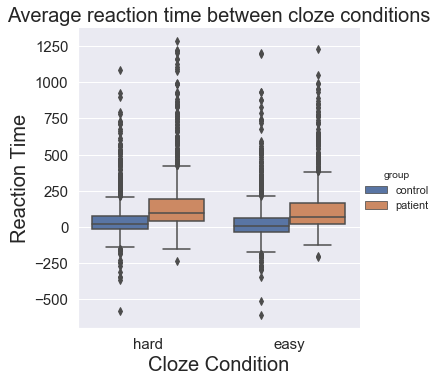

In [121]:
sns.set(rc={'figure.figsize':(20,10)})

sns.catplot(x="condition_name", y="rt_slope", hue='group', kind="box", data=df)
plt.xlabel('Cloze Condition', fontsize=20),
plt.ylabel('Reaction Time', fontsize=20)
plt.title('Average reaction time between cloze conditions', fontsize=20)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15);
 
plt.show()

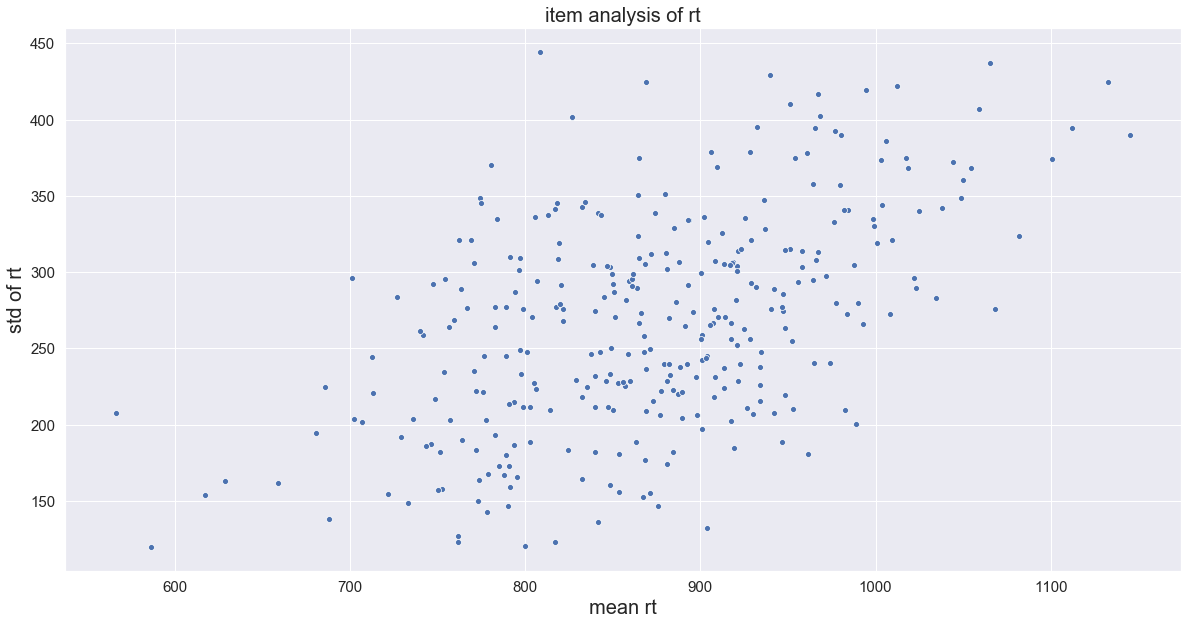

In [180]:
sns.set(rc={'figure.figsize':(20,10)})

#input string for certain groupby column

# table = pd.pivot_table(df, values=['D', 'E'], index=['A', 'C'],
# ...                     aggfunc={'D': np.mean,
# ...                              'E': np.mean})
#index - each trial
#which avg from control vs patient
#create mean and sd columns

#sns.scatterplot(x = df.groupby('spreadsheet_row')['rt'].mean(), y = df.groupby('spreadsheet_row')['rt'].std())
sns.scatterplot(x=df.groupby('')['rt'].mean())
plt.xlabel('mean rt', fontsize=20)
plt.ylabel('std of rt', fontsize=20)
plt.title('item analysis of rt', fontsize=20)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15);

plt.show()

In [91]:
df.columns

Index(['local_date', 'experiment_id', 'experiment_version',
       'participant_public_id', 'participant_id', 'task_name', 'task_version',
       'spreadsheet_version', 'spreadsheet_row', 'sentence_num', 'zone_type',
       'rt', 'response', 'attempt', 'correct', 'incorrect', 'display',
       'block_num', 'randomise_blocks', 'full_sentence', 'last_word',
       'sampled', 'CoRT_descript', 'CoRT_mean', 'condition_name', 'CoRT_std',
       'cloze_descript', 'cloze_probability', 'dataset', 'random_word',
       'target_word', 'word_count', 'group', 'cause_effect', 'dynamic_verb',
       'orientation', 'negative', 'tense', 'spelling_modified', 'trial_type',
       'version', 'version_descript', 'group_condition_name',
       'group_CoRT_condition', 'group_trial_type'],
      dtype='object')

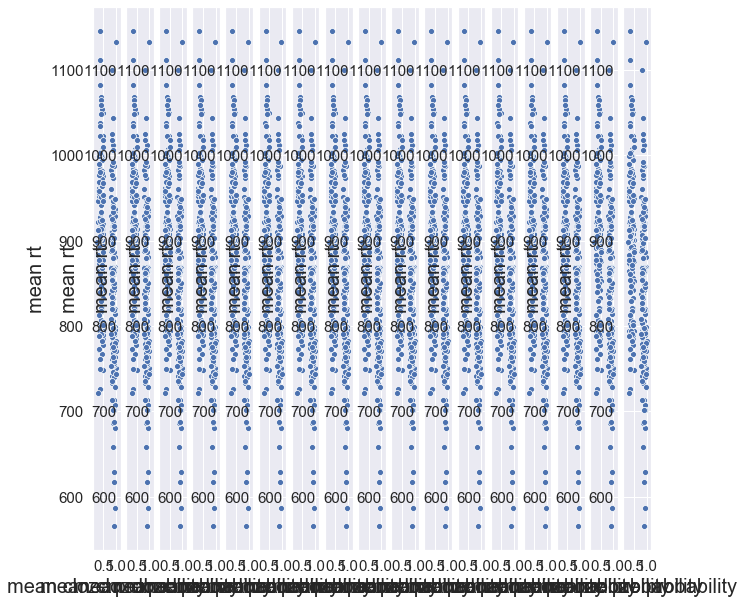

In [125]:
fig = plt.figure(figsize=(10,10))

participants = df['participant_id'].unique()

for i, participant in enumerate(participants):
    
    fig.add_subplot(1, len(participants), i+1)

    sns.scatterplot(x = df.groupby('spreadsheet_row')['cloze_probability'].mean(), y = df.groupby('spreadsheet_row')['rt'].mean())
    plt.xlabel('mean cloze probability', fontsize=20)
    plt.ylabel('mean rt', fontsize=20)
    plt.title('', fontsize=20)
    plt.tick_params(axis = 'both', which = 'major', labelsize = 15);

plt.show()

#look at group first

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})

sns.scatterplot(x = df.groupby('spreadsheet_row')['cloze_probability'].mean(), y = df.groupby('spreadsheet_row')['rt'].mean())
plt.xlabel('mean cloze probability', fontsize=20)
plt.ylabel('mean rt', fontsize=20)
plt.title('', fontsize=20)
plt.tick_params(axis = 'both', which = 'major', labelsize = 15);

plt.show()